In [1]:
import numpy as np
import pandas as pd

file_name = 'datingTestSet2.txt'
data = pd.read_table(file_name, names=['miles', 'game time', 'ice-cream', 'type'])
data[0:5]

,miles,game time,ice-cream,type
0,40920,8.326976,0.953952,3
1,14488,7.153469,1.673904,2
2,26052,1.441871,0.805124,1
3,75136,13.147394,0.428964,1
4,38344,1.669788,0.134296,1


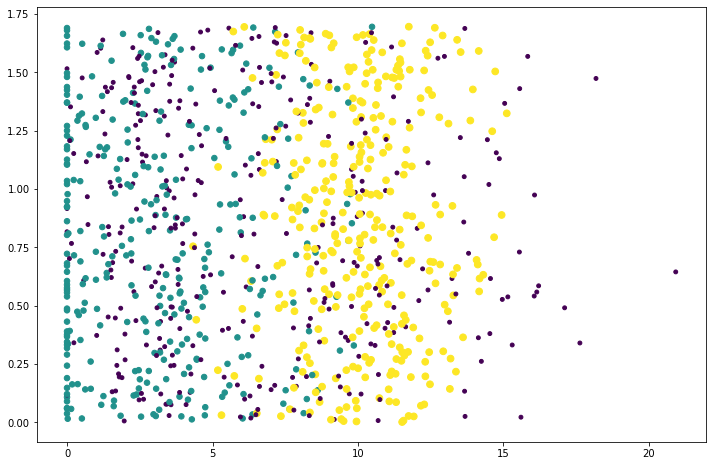

In [8]:
data_mat = data.iloc[:, 0:3].values
labels = data.iloc[:, -1].values

from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data_mat[:, 1], data_mat[:, 2], 15.0 * labels, 15.0 * labels)

In [9]:
data_max = np.amax(data_mat, axis=0)
data_min = np.amin(data_mat, axis=0)
data_mat = (data_mat - data_min) / (data_max - data_min)
data_mat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [19]:
k = 10
predict = np.asarray([10000, 10, 0.5])
n_predict = (predict - data_min) / (data_max - data_min)
distance = np.sqrt(np.sum(np.power(n_predict - data_mat, 2), axis=1))
k_sort = np.argsort(distance)
types = np.unique(labels)
dic = dict(zip(types, np.zeros(types.shape[0], np.uint)))
for i in range(k):
    dic[labels[k_sort[i]]] += 1
result = sorted(dic.items(), key=lambda x:x[1], reverse=True)
result

[(2, 6.0), (3, 4.0), (1, 0)]